In [5]:
import numpy as np
import matplotlib.pyplot as plt

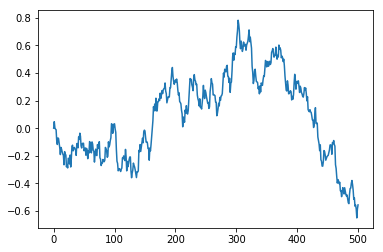

In [24]:
N = 500
T = 1
dt = T/N
dW = np.sqrt(dt)*np.random.normal(0,1,N)
W = np.zeros((N+1,))

W[1:] = np.cumsum(dW)
plt.plot(np.arange(0,501), W)


In [25]:
ito = np.sum(W[0:-1]*dW)
ito

-0.36474259466848463

Text(0.5, 0, 't')

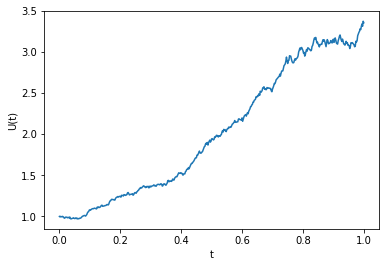

In [28]:
M = 10
t = np.arange(0,T+dt,dt)
dW = np.sqrt(dt)*np.random.normal(0,1,(N,M))
W = np.zeros((N+1,M))
W[1:,:] = np.cumsum(dW, axis=0)
ts = np.transpose(np.tile(t, (M,1)))

U = np.exp(ts + 0.5*W) 
Umean = np.mean(U, axis=1)
plt.plot(t, Umean)
plt.ylabel('U(t)')
plt.xlabel('t')

In [2]:
np.random.normal(0,1,5)

array([-1.62093069, -0.27150896,  1.18772545, -0.44673174, -1.52696054])

In [16]:
np.transpose(np.tile(np.array([1,2,3]), (2,1)))

array([[1, 1],
       [2, 2],
       [3, 3]])